# Prof. Pedram Jahangiry

You need to make a copy to your own Google drive if you want to edit the original notebook! Start by opening this notebook on Colab 👇

<a href="https://colab.research.google.com/github/PJalgotrader/Machine_Learning-USU/blob/main/Lectures%20and%20codes/Module%206-%20Penalized%20Regressions/regularization_Boston.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



![logo](https://upload.wikimedia.org/wikipedia/commons/4/44/Huntsman-Wordmark-with-USU-Blue.gif#center)


## 🔗 Links

[![linkedin](https://img.shields.io/badge/LinkedIn-0A66C2?style=for-the-badge&logo=linkedin&logoColor=white)](https://www.linkedin.com/in/pedram-jahangiry-cfa-5778015a)

[![Youtube](https://img.shields.io/badge/youtube_channel-1DA1F2?style=for-the-badge&logo=youtube&logoColor=white&color=FF0000)](https://www.youtube.com/channel/UCNDElcuuyX-2pSatVBDpJJQ)

[![Twitter URL](https://img.shields.io/twitter/url/https/twitter.com/PedramJahangiry.svg?style=social&label=Follow%20%40PedramJahangiry)](https://twitter.com/PedramJahangiry)


---

# Regularization: Penalized regression

Regularization force the learning algorithm to build a less complex model . In practice, that often leads to slightly higher bias but significantly reduces the variance. The most common penalized regression models are:

1. Ridge regression
2. Lasso regression
3. Elastic Net regression

In this notebook we will explore the three methods and compare their results with a multiple linear regression model applied to Boston Housing dataset. The target variable is **price** and the features are 13 variables listed below.

In [ ]:
# only if you want to run it in Google Colab:
# for this chapter, we can install the light version of PyCaret as below.

!pip install pycaret

# if you got a warning that you need to "RESTART RUNTIME", go ahead and press that button.


First we need to import the libraries:

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
sns.set()  #if you want to use seaborn themes with matplotlib functions
import warnings
warnings.filterwarnings('ignore')

In [3]:
rand_state= 1000

In [4]:
df = pd.read_csv("https://raw.githubusercontent.com/PJalgotrader/Machine_Learning-USU/main/data/boston_clean.csv")

In [5]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [6]:
df.drop('B', axis=1, inplace=True)

###  Splitting the data

In [7]:
y = df['price']
X = df.drop('price', axis=1) # be careful inplace= False

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=rand_state)
X_train.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT
300,0.04417,70.0,2.24,0.0,0.400,6.871,47.4,7.8278,5.0,358.0,14.8,6.07
32,1.38799,0.0,8.14,0.0,0.538,5.950,82.0,3.9900,4.0,307.0,21.0,27.71
181,0.06888,0.0,2.46,0.0,0.488,6.144,62.2,2.5979,3.0,193.0,17.8,9.45
272,0.11460,20.0,6.96,0.0,0.464,6.538,58.7,3.9175,3.0,223.0,18.6,7.73
477,15.02340,0.0,18.10,0.0,0.614,5.304,97.3,2.1007,24.0,666.0,20.2,24.91


In [8]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [9]:
X_train= scaler.fit_transform(X_train)
X_test= scaler.transform(X_test)

----

# A) Training the models

In this section we will train 4 different models:
1. Linear regression (model_linear)
2. Ridge regression (model_ridge)
3. Lasso regression (model_lasso)
4. Elastic Net regression (model_net)

In [10]:
from sklearn.linear_model import LinearRegression, Ridge,RidgeCV, Lasso, LassoCV, ElasticNet, ElasticNetCV

In [11]:
# starting with default parameters:
model_linear = LinearRegression()
model_ridge = Ridge(0)
model_lasso = Lasso(0)
model_net = ElasticNet(0)

In [12]:
y_hat_linear= model_linear.fit(X_train, y_train).predict(X_test)
y_hat_ridge = model_ridge.fit(X_train, y_train).predict(X_test)
y_hat_lasso = model_lasso.fit(X_train, y_train).predict(X_test)
y_hat_net   = model_net.fit(X_train, y_train).predict(X_test)

In [13]:
df_predictions = pd.DataFrame({'y_test':y_test,
                               'y_hat_linear':y_hat_linear,
                               'y_hat_ridge':y_hat_ridge,
                               'y_hat_lasso':y_hat_lasso,
                               'y_hat_net':y_hat_net})
df_predictions.head()

,y_test,y_hat_linear,y_hat_ridge,y_hat_lasso,y_hat_net
483,21.8,20.805692,20.805692,20.805692,20.805692
426,10.2,19.607459,19.607459,19.607459,19.607459
22,15.2,15.233529,15.233529,15.233529,15.233529
268,43.5,39.280957,39.280957,39.280957,39.280957
371,50.0,25.109791,25.109791,25.109791,25.109791


### coefficients

In [14]:
df.drop('price', axis=1, inplace=False).columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'LSTAT'],
      dtype='object')

In [15]:
coefficients = pd.DataFrame({'Features':df.drop('price', axis=1, inplace=False).columns})
coefficients['model_lin']= model_linear.coef_
coefficients['model_ridge']= model_ridge.coef_
coefficients['model_lasso']= model_lasso.coef_
coefficients['model_net']= model_net.coef_
coefficients

,Features,model_lin,model_ridge,model_lasso,model_net
0,CRIM,-1.277009,-1.277009,-1.277009,-1.277009
1,ZN,1.343597,1.343597,1.343597,1.343597
2,INDUS,-0.010820,-0.010820,-0.010820,-0.010820
3,CHAS,0.786778,0.786778,0.786778,0.786778
4,NOX,-2.577788,-2.577788,-2.577788,-2.577788
5,RM,2.289798,2.289798,2.289798,2.289798
6,AGE,0.077703,0.077703,0.077703,0.077703
7,DIS,-3.679772,-3.679772,-3.679772,-3.679772
8,RAD,2.561868,2.561868,2.561868,2.561868
9,TAX,-1.840361,-1.840361,-1.840361,-1.840361


----

### Performance in the test set

In [16]:
MSE_test = np.mean(np.square(df_predictions['y_test'] - df_predictions['y_hat_linear']))
RMSE_test = np.sqrt(MSE_test)
np.round(RMSE_test,3)

5.205

In [17]:
MSE_test = np.mean(np.square(df_predictions['y_test'] - df_predictions['y_hat_ridge']))
RMSE_test = np.sqrt(MSE_test)
np.round(RMSE_test,5)

5.20501

In [18]:
MSE_test = np.mean(np.square(df_predictions['y_test'] - df_predictions['y_hat_lasso']))
RMSE_test = np.sqrt(MSE_test)
np.round(RMSE_test,3)

5.205

In [19]:
MSE_test = np.mean(np.square(df_predictions['y_test'] - df_predictions['y_hat_net']))
RMSE_test = np.sqrt(MSE_test)
np.round(RMSE_test,3)

5.205

-------------

### Plotting the regression coefficients vs alphas:

#### 1) Ridge regression coefficients vs alpha

In [20]:
alpha_ridge = 10**np.linspace(0,6,100)

In [21]:
ridge = Ridge()
coefs_ridge = []

for i in alpha_ridge:
    ridge.set_params(alpha = i)
    ridge.fit(X_train, y_train)
    coefs_ridge.append(ridge.coef_)

np.shape(coefs_ridge)

(100, 12)

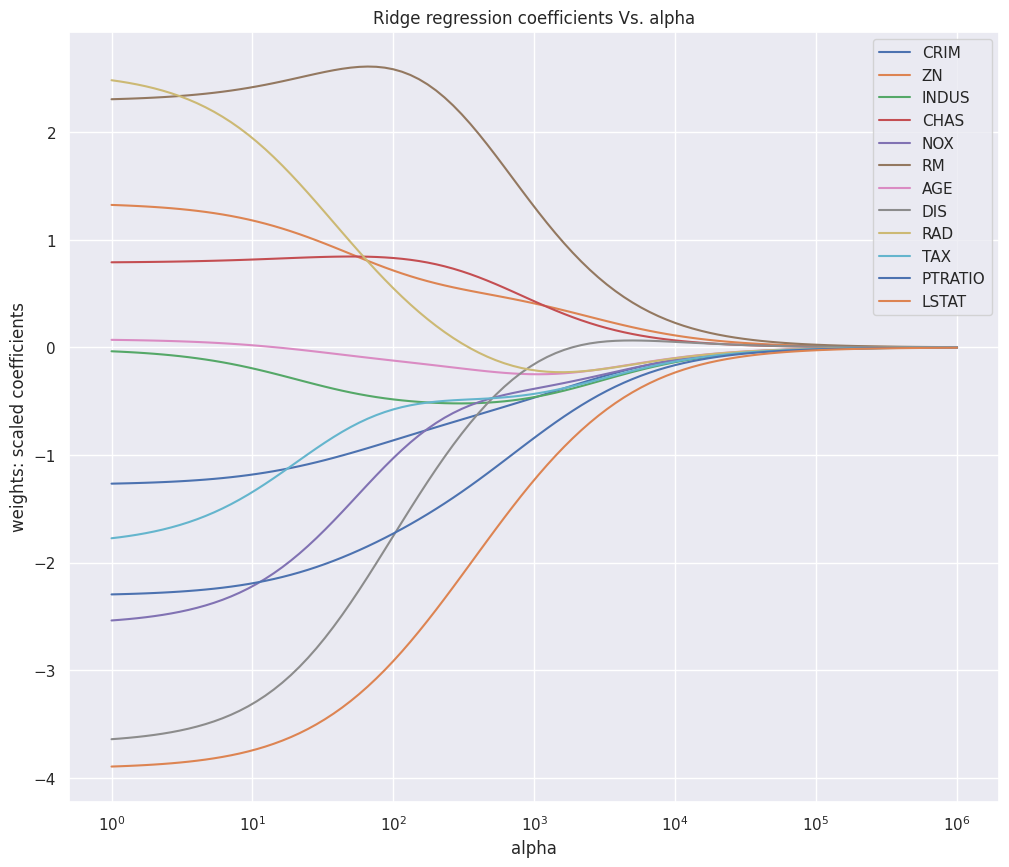

In [22]:
plt.figure(figsize=(12,10))
ax = plt.gca()
ax.plot(alpha_ridge, coefs_ridge)
ax.set_xscale('log')
plt.axis('tight')
plt.xlabel('alpha')
plt.ylabel('weights: scaled coefficients')
plt.title('Ridge regression coefficients Vs. alpha')
plt.legend(df.drop('price',axis=1, inplace=False).columns)

plt.show()

---

#### 2) Lasso regression coefficients vs alpha

In [23]:
alpha_lasso = 10**np.linspace(-3,1,100)

In [24]:
lasso = Lasso()
coefs_lasso = []

for i in alpha_lasso:
    lasso.set_params(alpha = i)
    lasso.fit(X_train, y_train)
    coefs_lasso.append(lasso.coef_)

np.shape(coefs_lasso)

(100, 12)

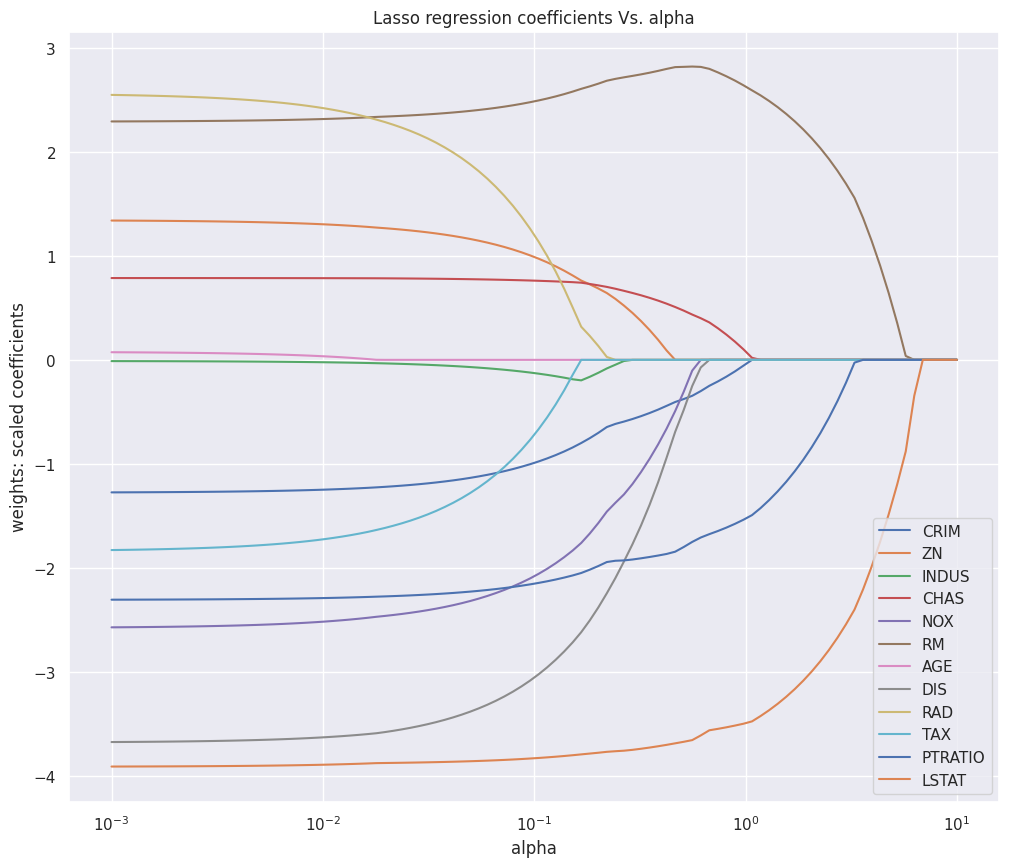

In [25]:
plt.figure(figsize=(12,10))
ax = plt.gca()
ax.plot(alpha_lasso, coefs_lasso)
ax.set_xscale('log')
plt.axis('tight')
plt.xlabel('alpha')
plt.ylabel('weights: scaled coefficients')
plt.title('Lasso regression coefficients Vs. alpha')
plt.legend(df.drop('price',axis=1, inplace=False).columns)

plt.show()

**Challenge**: Which coefficients survive when alpha = 1?

---

#### 3) Elastic Net regression coefficients vs alpha

In [26]:
alpha_elasticnet = 10**np.linspace(-3,2,100)

In [27]:
elasticnet = ElasticNet()
coefs_elasticnet = []

for i in alpha_elasticnet:
    elasticnet.set_params(alpha = i)
    elasticnet.fit(X_train, y_train)
    coefs_elasticnet.append(elasticnet.coef_)

np.shape(coefs_elasticnet)

(100, 12)

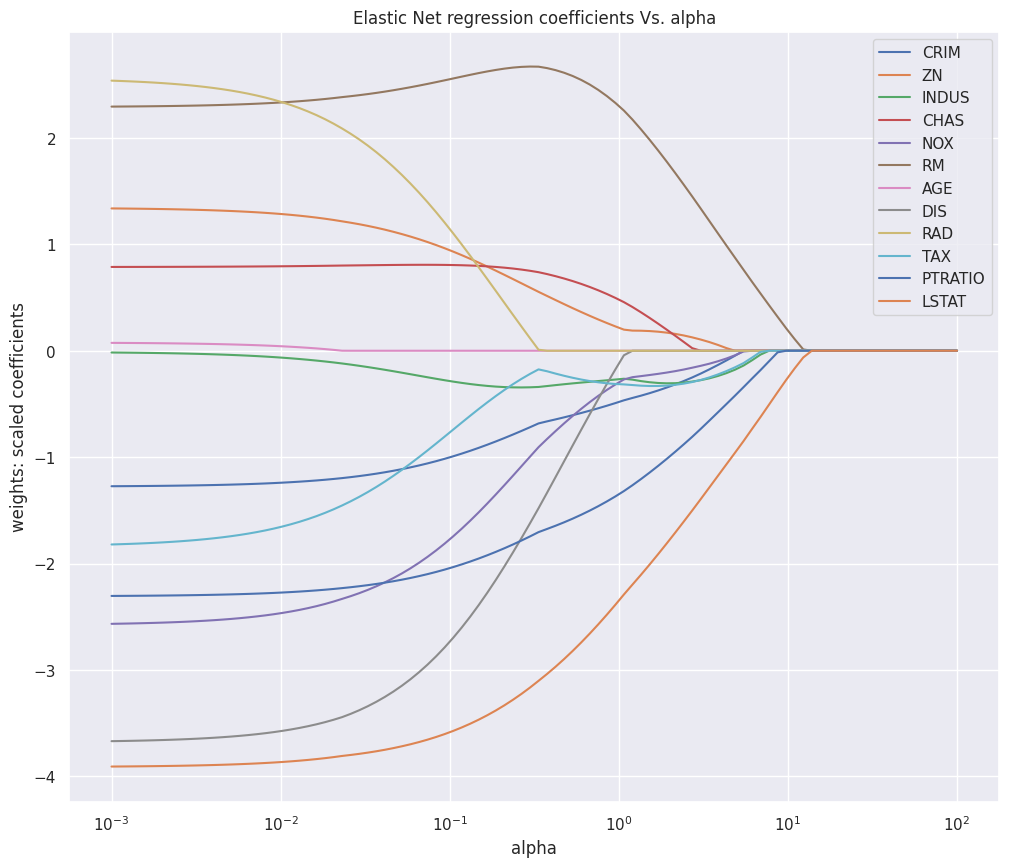

In [28]:
plt.figure(figsize=(12,10))
ax = plt.gca()
ax.plot(alpha_elasticnet, coefs_elasticnet)
ax.set_xscale('log')
plt.axis('tight')
plt.xlabel('alpha')
plt.ylabel('weights: scaled coefficients')
plt.title('Elastic Net regression coefficients Vs. alpha')
plt.legend(df.drop('price',axis=1, inplace=False).columns)

plt.show()

----

## Cross Validation

Let's use cross validation to find the optimal Lambdas (alphas) for different models.

#### 1) Optimal alpha for Ridge regression

In [29]:
ridgecv = RidgeCV(alphas=alpha_ridge)
ridgecv.fit(X_train, y_train)
ridgecv.alpha_

4.0370172585965545

In [30]:
alpha_ridge_opt = ridgecv.alpha_

In [31]:
ridgecv.coef_

array([-1.23359945,  1.26891691, -0.10079276,  0.80136588, -2.4191313 ,
        2.34903263,  0.05071697, -3.52203181,  2.26924744, -1.59671882,
       -2.25643117, -3.83922289])

----

#### 2) Optimal alpha for Lasso regression

In [32]:
lassocv = LassoCV(alphas=alpha_lasso)
lassocv.fit(X_train, y_train)
lassocv.alpha_

0.013530477745798075

In [33]:
alpha_lasso_opt = lassocv.alpha_

In [34]:
lassocv.coef_

array([-1.23840017,  1.2895203 , -0.0269597 ,  0.7849803 , -2.49651702,
        2.32456444,  0.01950808, -3.61200885,  2.37143026, -1.68564666,
       -2.28447542, -3.88611127])

----

#### 3) Optimal alpha for Elastic Net regression

In [35]:
elasticnetcv = ElasticNetCV(alphas=alpha_elasticnet, l1_ratio=np.linspace(0.0, 1, 11))
elasticnetcv.fit(X_train, y_train)
elasticnetcv.alpha_

0.009111627561154887

In [36]:
elasticnetcv.l1_ratio_

0.7000000000000001

In [37]:
alpha_elasticnet_opt = elasticnetcv.alpha_

----

#### Refit the models!

***Exercise***: Now go back and refit the 3 models with the optimal alphas!
- compare the RMSE_test?
- were you able to beat the linear regression model?
- what do you conclude?

----

---
---
# PyCaret

1. **PyCaret**: https://pycaret.readthedocs.io/en/latest/index.html PyCaret3.0
2. **scikit-learn**: https://scikit-learn.org/stable/index.html
3. **PyCaret model containers** : https://github.com/pycaret/pycaret/tree/master/pycaret/containers/models

# Installation

Follow the steps here: https://pycaret.gitbook.io/docs/get-started/installation


In [38]:

# let's double ckeck the Pycaret version:
from pycaret.utils import version
version()

'3.3.2'

In [39]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,5.33,36.2


In [40]:
from pycaret.regression import *

In [41]:
setup(df, target='price', session_id=1000, train_size=0.8, fold_strategy='kfold', fold=5,
      normalize=True, normalize_method='zscore')

,Description,Value
0,Session id,1000
1,Target,price
2,Target type,Regression
3,Original data shape,"(506, 13)"
4,Transformed data shape,"(506, 13)"
5,Transformed train set shape,"(404, 13)"
6,Transformed test set shape,"(102, 13)"
7,Numeric features,12
8,Preprocess,True
9,Imputation type,simple


In [42]:
models()

,Name,Reference,Turbo
ID,,,
lr,Linear Regression,sklearn.linear_model._base.LinearRegression,True
lasso,Lasso Regression,sklearn.linear_model._coordinate_descent.Lasso,True
ridge,Ridge Regression,sklearn.linear_model._ridge.Ridge,True
en,Elastic Net,sklearn.linear_model._coordinate_descent.Elast...,True
lar,Least Angle Regression,sklearn.linear_model._least_angle.Lars,True
llar,Lasso Least Angle Regression,sklearn.linear_model._least_angle.LassoLars,True
omp,Orthogonal Matching Pursuit,sklearn.linear_model._omp.OrthogonalMatchingPu...,True
br,Bayesian Ridge,sklearn.linear_model._bayes.BayesianRidge,True
ard,Automatic Relevance Determination,sklearn.linear_model._bayes.ARDRegression,False


## Create and tune model

In [43]:
lr = create_model(estimator='lr')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,3.3992,24.1058,4.9098,0.6593,0.2045,0.1574
1,3.6256,30.5693,5.5290,0.6963,0.2618,0.1654
2,3.1717,18.6257,4.3158,0.6910,0.2865,0.1811
3,3.3452,17.8032,4.2194,0.7514,0.2199,0.1640
4,3.9383,29.7353,5.4530,0.7364,0.2512,0.1900
Mean,3.4960,24.1679,4.8854,0.7069,0.2448,0.1716
Std,0.2644,5.3517,0.5486,0.0331,0.0294,0.0121


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [44]:
tuned_lr = tune_model(lr) # why the ouput is exactly the same as untuned model?

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,3.3992,24.1058,4.9098,0.6593,0.2045,0.1574
1,3.6256,30.5693,5.5290,0.6963,0.2618,0.1654
2,3.1717,18.6257,4.3158,0.6910,0.2865,0.1811
3,3.3452,17.8032,4.2194,0.7514,0.2199,0.1640
4,3.9383,29.7353,5.4530,0.7364,0.2512,0.1900
Mean,3.4960,24.1679,4.8854,0.7069,0.2448,0.1716
Std,0.2644,5.3517,0.5486,0.0331,0.0294,0.0121


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 5 folds for each of 2 candidates, totalling 10 fits


Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


In [45]:
lasso = create_model(estimator='lasso')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,3.5119,31.4823,5.6109,0.5551,0.2332,0.1601
1,4.0878,37.9269,6.1585,0.6232,0.2910,0.1927
2,3.6813,22.8768,4.7830,0.6205,0.2722,0.2154
3,3.3219,20.5123,4.5291,0.7136,0.2194,0.1715
4,4.5917,42.6236,6.5287,0.6221,0.2685,0.2115
Mean,3.8389,31.0844,5.5220,0.6269,0.2569,0.1903
Std,0.4534,8.4766,0.7692,0.0505,0.0265,0.0217


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [46]:
tuned_lasso = tune_model(lasso)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,3.7290,33.5404,5.7914,0.5260,0.2359,0.1744
1,4.4919,42.6554,6.5311,0.5762,0.2696,0.2173
2,3.8108,23.6701,4.8652,0.6074,0.2497,0.2243
3,3.4845,23.4119,4.8386,0.6731,0.2238,0.1803
4,4.8540,48.3861,6.9560,0.5710,0.2635,0.2195
Mean,4.0740,34.3328,5.7965,0.5907,0.2485,0.2032
Std,0.5136,10.0035,0.8566,0.0487,0.0170,0.0213


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 5 folds for each of 10 candidates, totalling 50 fits


Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


In [47]:
ridge = create_model(estimator='ridge')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,3.3909,24.1430,4.9135,0.6588,0.2048,0.1569
1,3.6277,30.6910,5.5399,0.6951,0.2624,0.1653
2,3.1632,18.5845,4.3110,0.6917,0.2855,0.1808
3,3.3245,17.6296,4.1988,0.7538,0.2169,0.1630
4,3.9311,29.7609,5.4554,0.7361,0.2519,0.1896
Mean,3.4875,24.1618,4.8837,0.7071,0.2443,0.1711
Std,0.2674,5.4361,0.5578,0.0339,0.0296,0.0122


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [48]:
tuned_ridge = tune_model(ridge)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,3.3529,24.4092,4.9406,0.6550,0.2068,0.1546
1,3.6388,31.3484,5.5990,0.6886,0.2655,0.1647
2,3.1293,18.4044,4.2900,0.6947,0.2799,0.1798
3,3.2213,16.9067,4.1118,0.7639,0.2058,0.1580
4,3.8967,29.9868,5.4760,0.7341,0.2568,0.1875
Mean,3.4478,24.2111,4.8835,0.7073,0.2429,0.1689
Std,0.2828,5.8551,0.6023,0.0379,0.0308,0.0127


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 5 folds for each of 10 candidates, totalling 50 fits


In [49]:
elasticnet = create_model(estimator='en')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,3.6349,32.4992,5.7008,0.5407,0.2318,0.1645
1,4.3179,43.4487,6.5916,0.5683,0.2556,0.1973
2,3.3740,19.1088,4.3714,0.6830,0.2199,0.1944
3,3.3026,20.5389,4.5320,0.7132,0.2028,0.1675
4,4.6780,46.6261,6.8283,0.5866,0.2589,0.2124
Mean,3.8615,32.4444,5.6048,0.6184,0.2338,0.1872
Std,0.5434,11.3296,1.0151,0.0674,0.0213,0.0184


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [50]:
tuned_elasticnet = tune_model(elasticnet)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,3.3270,24.8974,4.9897,0.6481,0.2100,0.1525
1,3.6436,31.8001,5.6392,0.6841,0.2841,0.1642
2,3.1703,19.1550,4.3766,0.6823,0.2882,0.1838
3,3.1605,16.7064,4.0873,0.7667,0.2020,0.1560
4,3.8974,30.8967,5.5585,0.7261,0.2660,0.1868
Mean,3.4398,24.6911,4.9303,0.7014,0.2501,0.1687
Std,0.2878,6.0579,0.6193,0.0409,0.0368,0.0141


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 5 folds for each of 10 candidates, totalling 50 fits


In [51]:
compare_models([lr,tuned_lr, lasso, tuned_lasso, ridge, tuned_ridge, elasticnet, tuned_elasticnet])

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
5,Ridge Regression,3.4478,24.2111,4.8835,0.7073,0.2429,0.1689,0.0440
4,Ridge Regression,3.4875,24.1618,4.8837,0.7071,0.2443,0.1711,0.0580
0,Linear Regression,3.4960,24.1679,4.8854,0.7069,0.2448,0.1716,0.0340
1,Linear Regression,3.4960,24.1679,4.8854,0.7069,0.2448,0.1716,0.0400
7,Elastic Net,3.4398,24.6911,4.9303,0.7014,0.2501,0.1687,0.0640
2,Lasso Regression,3.8389,31.0844,5.5220,0.6269,0.2569,0.1903,0.0500
3,Lasso Regression,3.8389,31.0844,5.5220,0.6269,0.2569,0.1903,0.0580
6,Elastic Net,3.8615,32.4444,5.6048,0.6184,0.2338,0.1872,0.0680


Processing:   0%|          | 0/37 [00:00<?, ?it/s]

Ridge(alpha=6.87, random_state=1000)

The best model is tuned ridge!

## Plot model

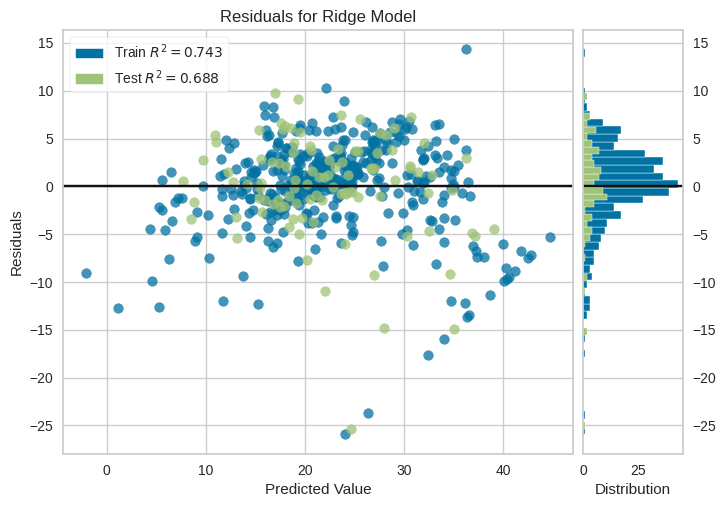

In [52]:
plot_model(tuned_ridge,plot='residuals')

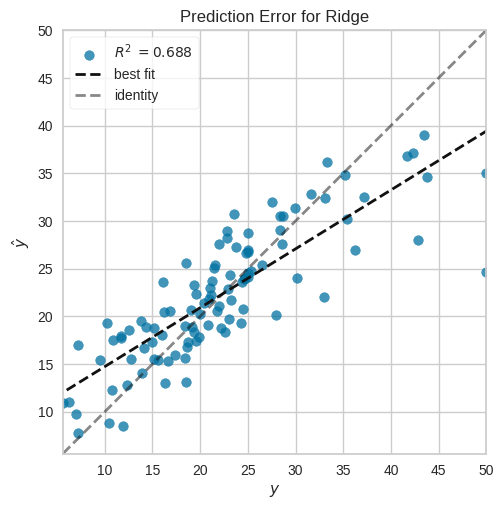

In [53]:
plot_model(tuned_ridge,plot='error' )

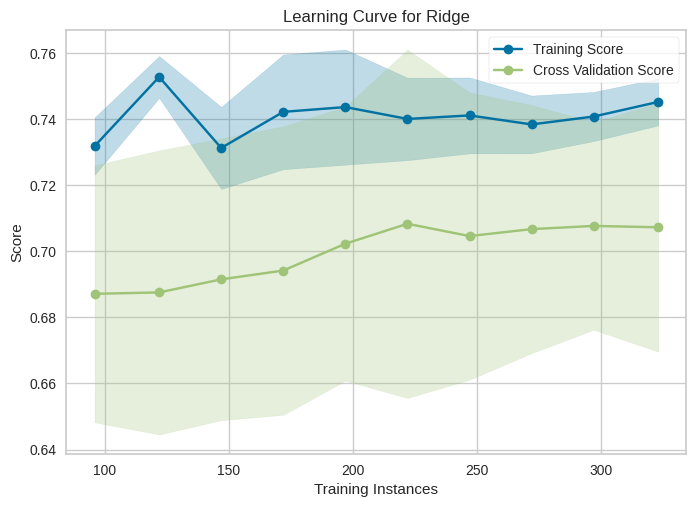

In [54]:
plot_model(tuned_ridge,plot='learning')

## Predict model

In [55]:
pycaret_predictions = predict_model(tuned_ridge)
pycaret_predictions

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Ridge Regression,3.6484,26.6586,5.1632,0.6875,0.2294,0.1943


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,price,prediction_label
483,2.81838,0.0,18.10,0.0,0.532,5.762,40.299999,4.0983,24.0,666.0,20.200001,10.420000,21.799999,20.512512
426,12.24720,0.0,18.10,0.0,0.584,5.837,59.700001,1.9976,24.0,666.0,20.200001,15.690000,10.200000,19.299355
22,1.23247,0.0,8.14,0.0,0.538,6.142,91.699997,3.9769,4.0,307.0,21.000000,18.719999,15.200000,15.522646
268,0.54050,20.0,3.97,0.0,0.575,7.470,52.599998,2.8720,5.0,264.0,13.000000,3.160000,43.500000,39.009262
371,9.23230,0.0,18.10,0.0,0.631,6.216,100.000000,1.1691,24.0,666.0,20.200001,9.530000,50.000000,24.663048
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
285,0.01096,55.0,2.25,0.0,0.389,6.453,31.900000,7.3073,1.0,300.0,15.300000,8.230000,22.000000,27.545547
46,0.18836,0.0,6.91,0.0,0.448,5.786,33.299999,5.1004,3.0,233.0,17.900000,14.150000,20.000000,20.216953
465,3.16360,0.0,18.10,0.0,0.655,5.759,48.200001,3.0665,24.0,666.0,20.200001,14.130000,19.900000,17.859528
486,5.69175,0.0,18.10,0.0,0.583,6.114,79.800003,3.5459,24.0,666.0,20.200001,14.980000,19.100000,18.917501


In [56]:
tuned_ridge.predict(X_test)

array([20.51251327, 19.2993549 , 15.52264407, 39.00926058, 24.66304785,
       32.52114149,  9.75609989, 37.13723583, 18.09524946, 17.45203084,
       34.85022547, 20.79605207, 29.03613468, 15.38418715, 25.58129249,
       24.04170958, 21.11756774, 15.58203127, 18.88101469, 30.57329127,
       24.05666039, 16.74424632, 32.81872616, 18.79494014, 19.04320058,
       14.10344713, 20.6085535 , 18.39293272, 22.36997437, 13.09299317,
       35.03958374, 30.70656614, 19.48243647, 24.74794794, 17.53284982,
       25.33889548, 25.08389411, 34.59336686, 27.97405076, 15.34519311,
       21.37990683, 36.80780357,  7.73141164, 22.28665171, 22.822633  ,
       28.18694825, 26.95294788, 16.66347619, 18.36587128, 24.32052422,
       23.6200273 , 27.24532224, 15.67168272, 16.9482405 , 28.92012322,
       18.79669365, 22.98079896, 13.05876184, 17.35310415, 17.30284338,
       17.99248528, 25.37586585, 27.56839936, 10.98340283, 28.7578123 ,
       31.34797739, 21.73310953, 23.60221368, 26.94530868, 18.57

----

###  Additional links:
1. Underfitting vs Overfitting: https://scikit-learn.org/stable/auto_examples/model_selection/plot_underfitting_overfitting.html#sphx-glr-auto-examples-model-selection-plot-underfitting-overfitting-py
2. From Linear Regression to Ridge Regression, the Lasso, and the Elastic Net: https://towardsdatascience.com/from-linear-regression-to-ridge-regression-the-lasso-and-the-elastic-net-4eaecaf5f7e6
3. Standardizing features in Python:https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html
4. sklearn Ridge: https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Ridge.html
5. sklearn RidgeCV: https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.RidgeCV.html#sklearn.linear_model.RidgeCV
6. sklearn Lasso: https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Lasso.html
7. skearn LassoCV: https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LassoCV.html#sklearn.linear_model.LassoCV
8. sklearn Elasticnet: https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.ElasticNet.html
9. sklearn ElasticNetCV: https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.ElasticNetCV.html#sklearn.linear_model.ElasticNetCV

